In [1]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


0        Date  Consumption  Cost (no GST)  Average Cost per kw/h
1  2019-05-01        60151       13252.72                  0.305
2  2019-06-01        76922       16752.32                  0.230
3  2019-07-01       117715       25435.23                  0.210
4  2019-08-01        93960       14409.09                  0.155
5  2019-09-01        66786       16107.83                  0.285
6  2019-10-01       212701       45988.60                  0.215
7  2019-11-01       169746       27271.24                  0.160
8  2019-12-01        51563       10145.83                  0.460
9  2020-01-01        57396       11696.75                  0.420
10 2020-02-01        49893       11405.72                  0.975
11 2020-03-01        57474       12381.14                  0.370
12 2020-04-01        42157        8984.81                  0.885
13 2020-05-01        64260       14479.18                  0.250
14 2020-06-01        85550       17559.29                  0.200
15 2020-07-01       22276

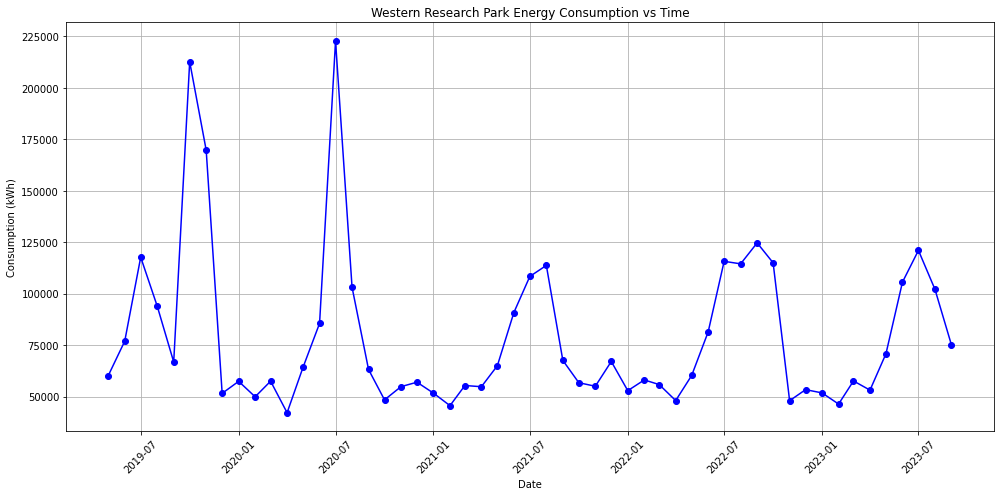

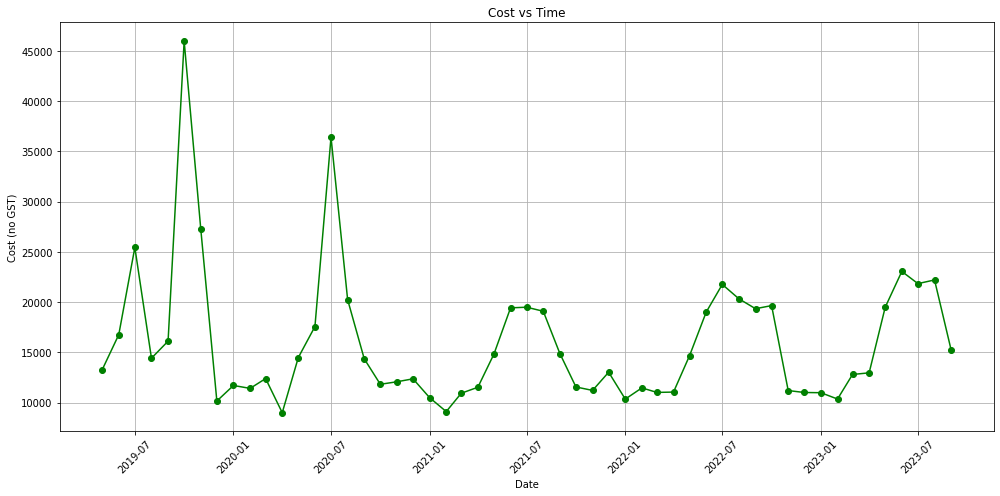

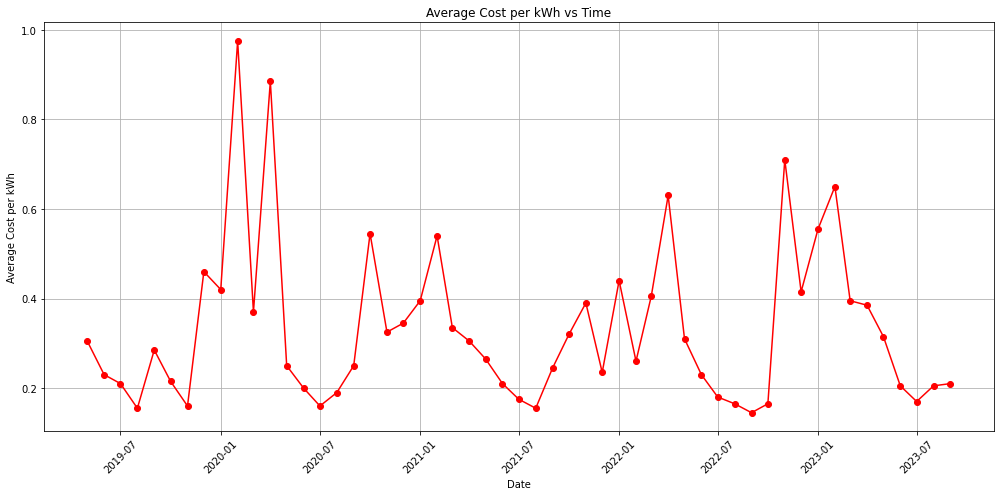

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the Excel file
file_path = './Research Park Electricity bills.xlsx'
research_park_consumption = pd.read_excel(file_path)

# Clean and prepare the data for plotting
research_park_consumption.columns = research_park_consumption.iloc[0]  # Set the first row as the header
research_park_consumption = research_park_consumption.drop(0)  # Drop the header row from the dataframe

# Convert 'Date' column to datetime, keeping the first date in the range for simplicity
research_park_consumption['Date'] = pd.to_datetime(research_park_consumption['Date'].str.extract(r'(.*?)-')[0] + ', ' + research_park_consumption['Date'].str[-4:], errors='coerce')

# Convert 'Consumption', 'Cost (no GST)', and 'Average Cost per kw/h' to numeric
research_park_consumption['Consumption'] = pd.to_numeric(research_park_consumption['Consumption'], errors='coerce')
research_park_consumption['Cost (no GST)'] = pd.to_numeric(research_park_consumption['Cost (no GST)'], errors='coerce')
research_park_consumption['Average Cost per kw/h'] = pd.to_numeric(research_park_consumption['Average Cost per kw/h'], errors='coerce')

# Drop rows with missing dates
research_park_consumption = research_park_consumption.dropna(subset=['Date'])

print(research_park_consumption)
print("\nMax Monthly Consumption: "+str(max(research_park_consumption['Consumption']))+" kWh")
daily_max_consumption = max(research_park_consumption['Consumption'])/30
print("Max daily consumption based on max monthly: "+str(daily_max_consumption)+" kWh")

# Plot energy consumption vs time
plt.figure(figsize=(14, 7))
plt.plot(research_park_consumption['Date'], research_park_consumption['Consumption'], marker='o', linestyle='-', color='blue')
plt.title('Western Research Park Energy Consumption vs Time')
plt.xlabel('Date')
plt.ylabel('Consumption (kWh)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of ylabel
plt.show()

# Plot cost vs time
plt.figure(figsize=(14, 7))
plt.plot(research_park_consumption['Date'], research_park_consumption['Cost (no GST)'], marker='o', linestyle='-', color='green')
plt.title('Cost vs Time')
plt.xlabel('Date')
plt.ylabel('Cost (no GST)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of ylabel
plt.show()

# Plot average cost vs time
plt.figure(figsize=(14, 7))
plt.plot(research_park_consumption['Date'], research_park_consumption['Average Cost per kw/h'], marker='o', linestyle='-', color='red')
plt.title('Average Cost per kWh vs Time')
plt.xlabel('Date')
plt.ylabel('Average Cost per kWh')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of ylabel
plt.show()


# Generation Esitmations using PVWatts Calculator
https://pvwatts.nrel.gov/pvwatts.php
## Premium	Crystalline Silicon	21%	Glass with anti-reflective coating	-0.35%/°C
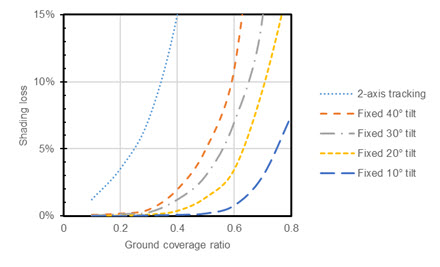
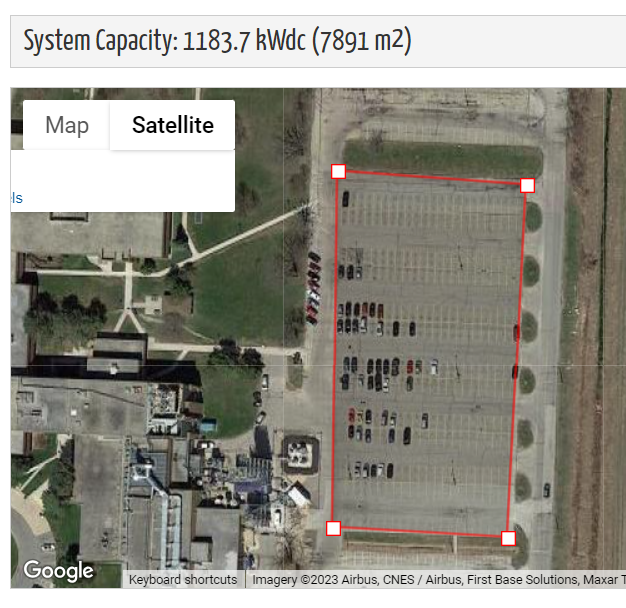
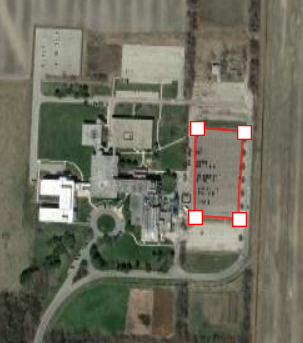
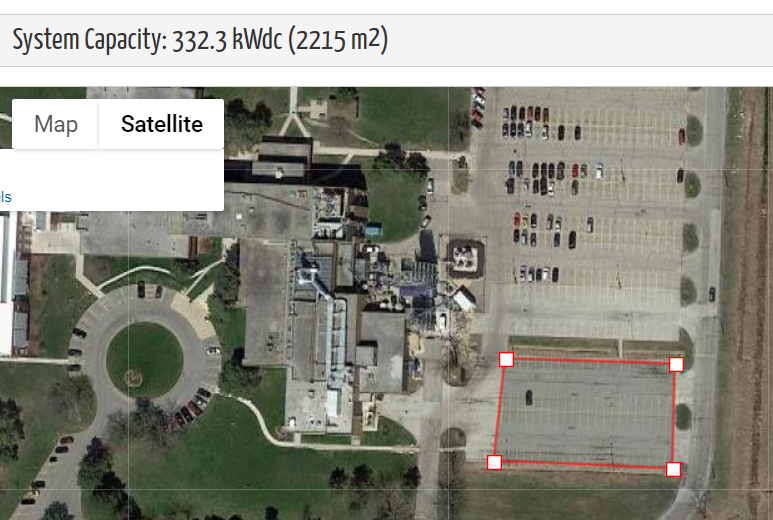
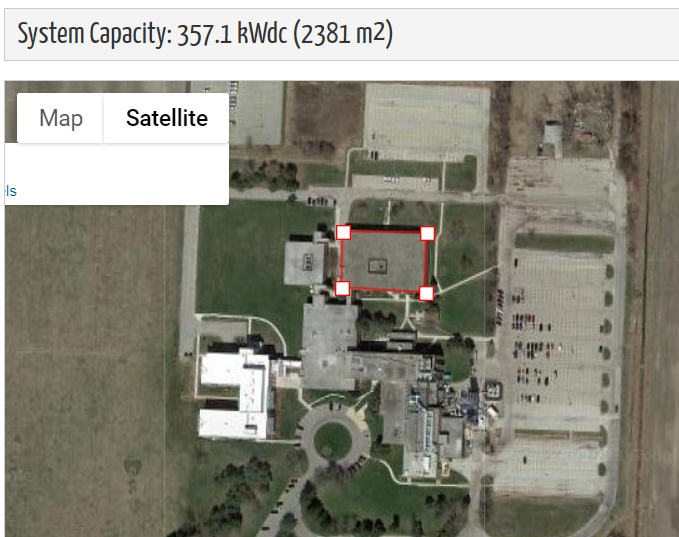
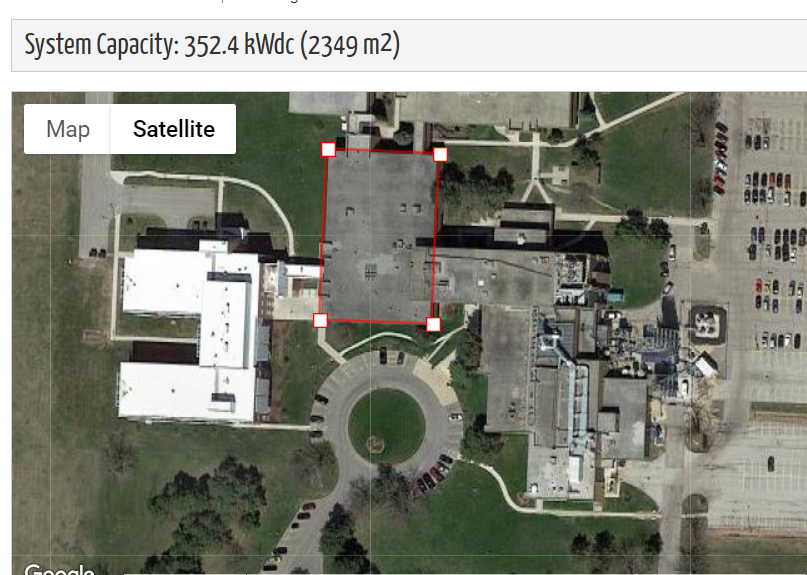
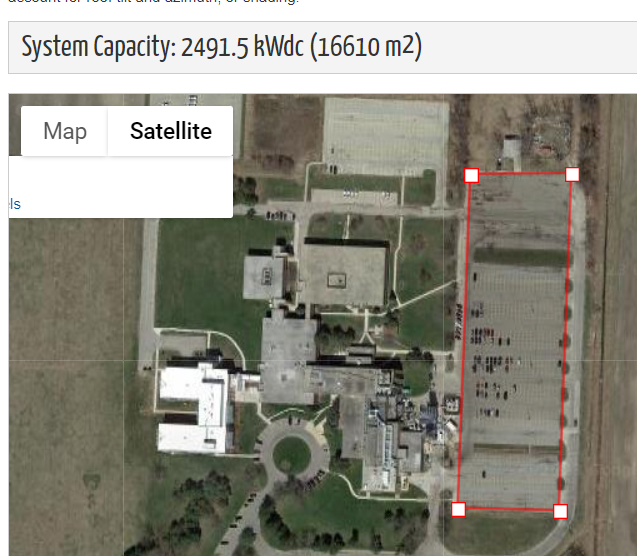

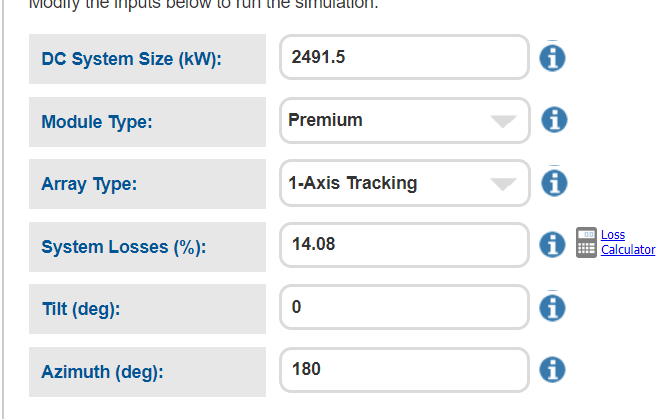

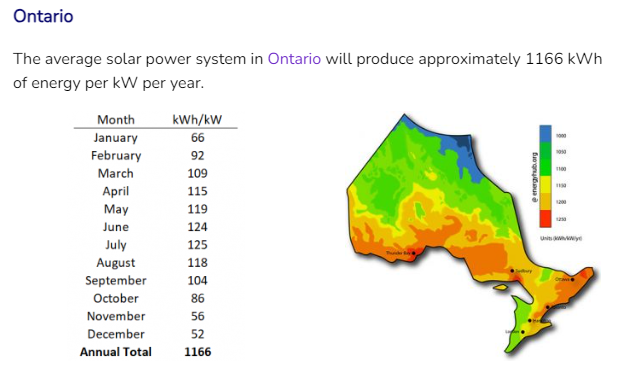

## Fixed Solar Data

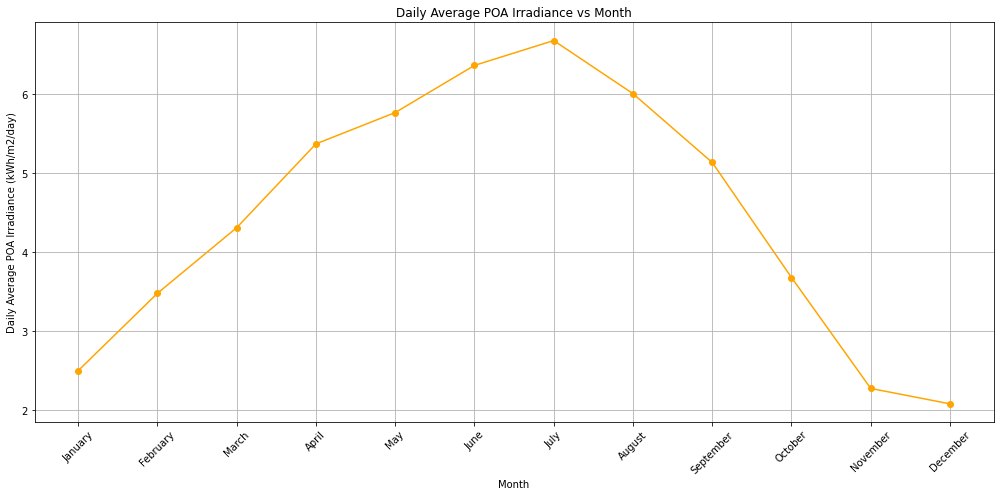

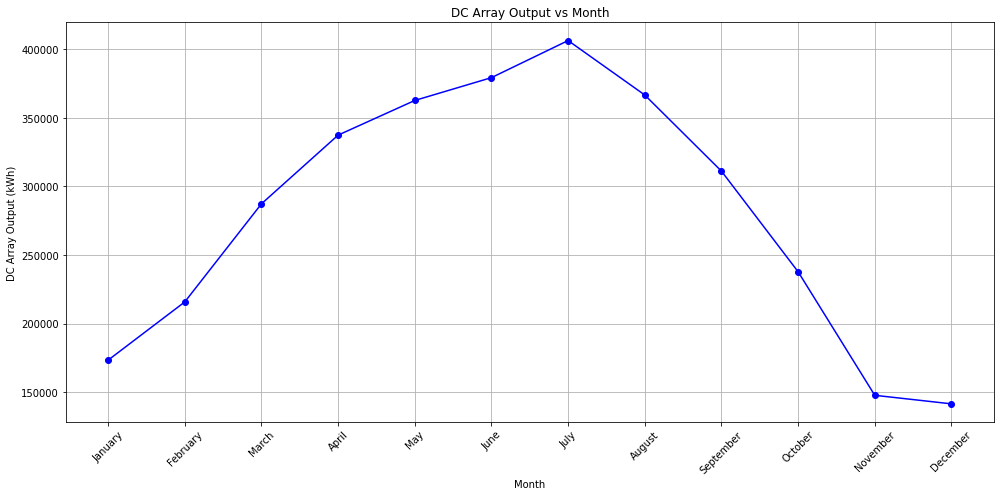

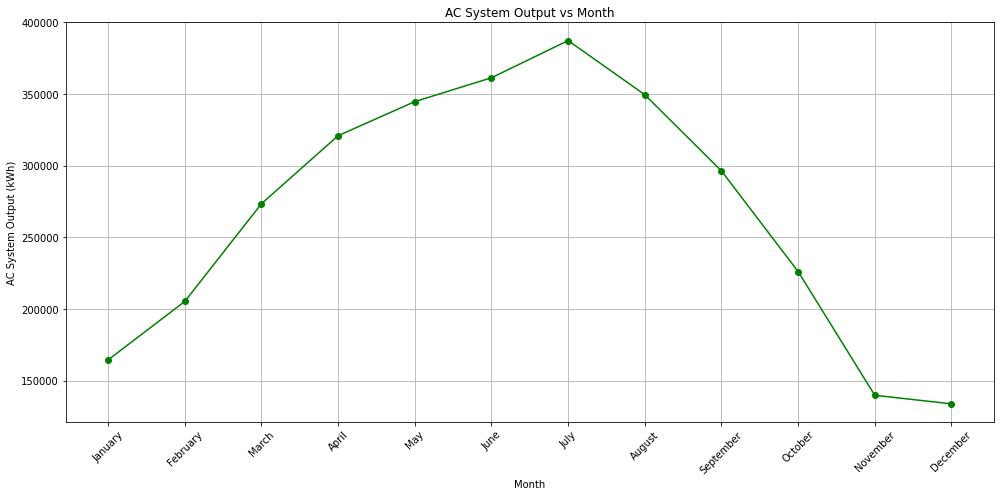

Total kWh from fixed system: 3203065.461


Month  Daily Average POA Irradiance (kWh/m2/day)  \
0     January                                      2.499   
1    February                                      3.477   
2       March                                      4.307   
3       April                                      5.366   
4         May                                      5.762   
5        June                                      6.358   
6        July                                      6.672   
7      August                                      6.001   
8   September                                      5.131   
9     October                                      3.677   
10   November                                      2.275   
11   December                                      2.080   

    DC Array Output (kWh)  AC System Output (kWh)  
0              173335.199              164447.205  
1              215780.469              205242.899  
2              287254.224              273438.346  
3              337333.702              320942.110  
4              362593.738              344732.060  
5              379227.751              361376.305  
6              406248.073              387338.604  
7              366568.472              349541.170  
8              311112.649              296377.171  
9              237762.384              226110.364  
10             147718.461              139754.401  
11             141489.804              133764.826

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

# Load the data from the CSV file
file_path = './fixed_pvwatts_monthly.csv'

# You may need to adjust the number in skiprows to match the actual number of rows to skip
fixed_solar_data = pd.read_csv(file_path, skiprows=range(0, 32))  # for example, if the first 31 lines are headers

#print(fixed_solar_data)
fixed_total_kWh = 0
for ele in fixed_solar_data['AC System Output (kWh)']:
    fixed_total_kWh += ele


# Convert the 'Month' column to month names
fixed_solar_data['Month'] = fixed_solar_data['Month'].apply(lambda x: calendar.month_name[int(x)])

# Plot "Daily Average POA Irradiance (kWh/m2/day)" versus month
plt.figure(figsize=(14, 7))
plt.plot(fixed_solar_data['Month'], fixed_solar_data['Daily Average POA Irradiance (kWh/m2/day)'], marker='o', linestyle='-', color='orange')
plt.title('Daily Average POA Irradiance vs Month')
plt.xlabel('Month')
plt.ylabel('Daily Average POA Irradiance (kWh/m2/day)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of ylabel
plt.show()

# Plot "DC Array Output (kWh)" versus month
plt.figure(figsize=(14, 7))
plt.plot(fixed_solar_data['Month'], fixed_solar_data['DC Array Output (kWh)'], marker='o', linestyle='-', color='blue')
plt.title('DC Array Output vs Month')
plt.xlabel('Month')
plt.ylabel('DC Array Output (kWh)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of ylabel
plt.show()

# Plot "AC System Output (kWh)" versus month
plt.figure(figsize=(14, 7))
plt.plot(fixed_solar_data['Month'], fixed_solar_data['AC System Output (kWh)'], marker='o', linestyle='-', color='green')
plt.title('AC System Output vs Month')
plt.xlabel('Month')
plt.ylabel('AC System Output (kWh)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of ylabel
plt.show()

print("Total kWh from fixed system:", fixed_total_kWh)
fixed_solar_data


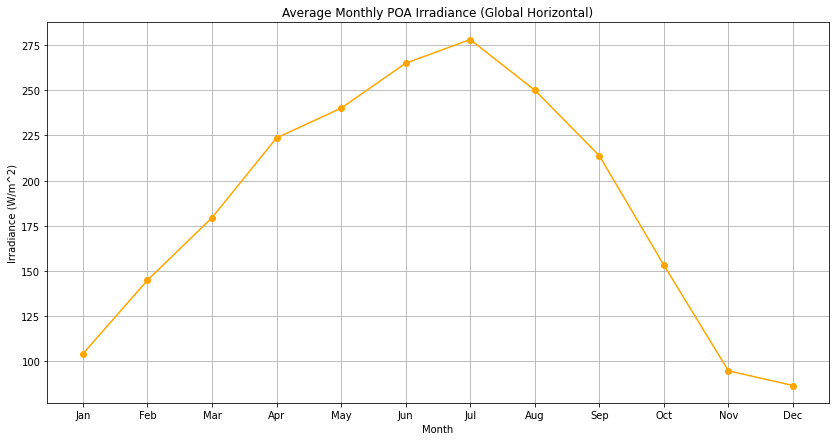

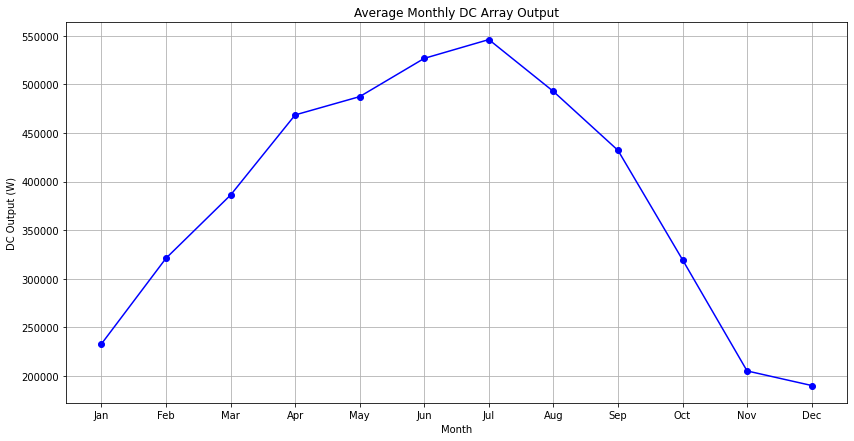

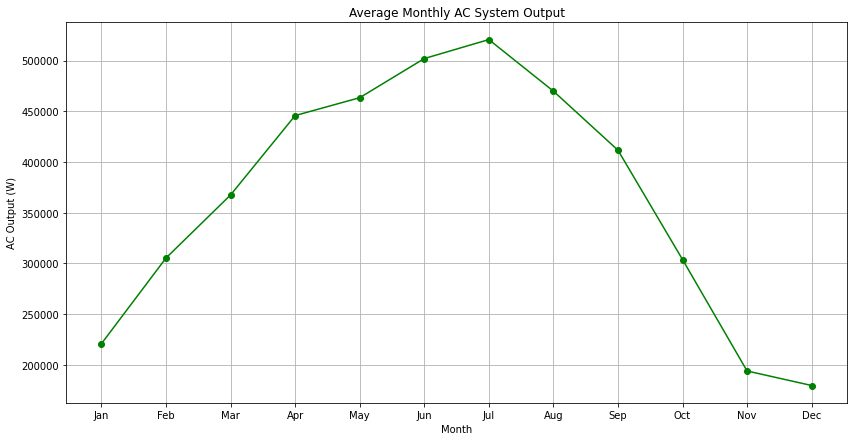

Month  Day  Hour  Beam Irradiance (W/m2)  Diffuse Irradiance (W/m2)  \
0      Jan    1     0                       0                          0   
1      Jan    1     1                       0                          0   
2      Jan    1     2                       0                          0   
3      Jan    1     3                       0                          0   
4      Jan    1     4                       0                          0   
...    ...  ...   ...                     ...                        ...   
8755   Dec   31    19                       0                          0   
8756   Dec   31    20                       0                          0   
8757   Dec   31    21                       0                          0   
8758   Dec   31    22                       0                          0   
8759   Dec   31    23                       0                          0   

      Ambient Temperature (C)  Wind Speed (m/s)  Albedo  \
0                        -4.0               4.4    0.87   
1                        -5.0               4.3    0.87   
2                        -5.0               4.1    0.87   
3                        -6.0               3.9    0.87   
4                        -6.0               3.9    0.87   
...                       ...               ...     ...   
8755                      0.0               3.9    0.87   
8756                     -1.0               3.7    0.87   
8757                     -2.0               3.7    0.87   
8758                     -3.0               4.0    0.87   
8759                     -3.0               4.3    0.87   

      Plane of Array Irradiance (W/m2)  Cell Temperature (C)  \
0                                  0.0                  -4.0   
1                                  0.0                  -5.0   
2                                  0.0                  -5.0   
3                                  0.0                  -6.0   
4                                  0.0                  -6.0   
...                                ...                   ...   
8755                               0.0                   0.0   
8756                               0.0                  -1.0   
8757                               0.0                  -2.0   
8758                               0.0                  -3.0   
8759                               0.0                  -3.0   

      DC Array Output (W)  AC System Output (W)  
0                     0.0                   0.0  
1                     0.0                   0.0  
2                     0.0                   0.0  
3                     0.0                   0.0  
4                     0.0                   0.0  
...                   ...                   ...  
8755                  0.0                   0.0  
8756                  0.0                   0.0  
8757                  0.0                   0.0  
8758                  0.0                   0.0  
8759                  0.0                   0.0  

[8760 rows x 12 columns]

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

# Load the hourly data from the CSV file, skipping the non-data rows and manually setting the column names
file_path_hourly = './fixed_pvwatts_hourly.csv'
fixed_solar_data_hourly = pd.read_csv(file_path_hourly, skiprows=31)

# Convert the 'Month' column to month names for better readability in the plots
fixed_solar_data_hourly['Month'] = fixed_solar_data_hourly['Month'].apply(lambda x: calendar.month_abbr[int(x)])

# Group the data by month to get average values for each month
monthly_data = fixed_solar_data_hourly.groupby('Month', sort=False).mean().reset_index()

# Plot "POA Irradiance (Global Horizontal) (kW/m^2)" versus month
plt.figure(figsize=(14, 7))
plt.plot(monthly_data['Month'], monthly_data['Plane of Array Irradiance (W/m2)'], marker='o', linestyle='-', color='orange')
plt.title('Average Monthly POA Irradiance (Global Horizontal)')
plt.xlabel('Month')
plt.ylabel('Irradiance (W/m^2)')
plt.grid(True)
plt.show()

# Plot "DC Array Output (kW)" versus month
plt.figure(figsize=(14, 7))
plt.plot(monthly_data['Month'], monthly_data['DC Array Output (W)'], marker='o', linestyle='-', color='blue')
plt.title('Average Monthly DC Array Output')
plt.xlabel('Month')
plt.ylabel('DC Output (W)')
plt.grid(True)
plt.show()

# Plot "AC System Output (kW)" versus month
plt.figure(figsize=(14, 7))
plt.plot(monthly_data['Month'], monthly_data['AC System Output (W)'], marker='o', linestyle='-', color='green')
plt.title('Average Monthly AC System Output')
plt.xlabel('Month')
plt.ylabel('AC Output (W)')
plt.grid(True)
plt.show()

fixed_solar_data_hourly


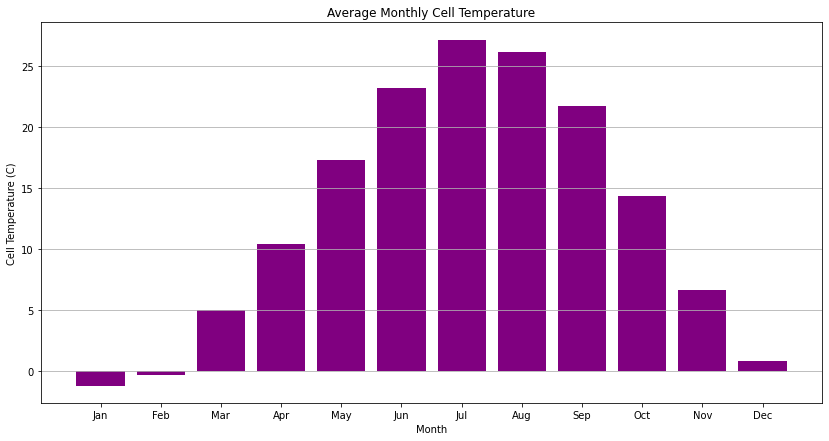

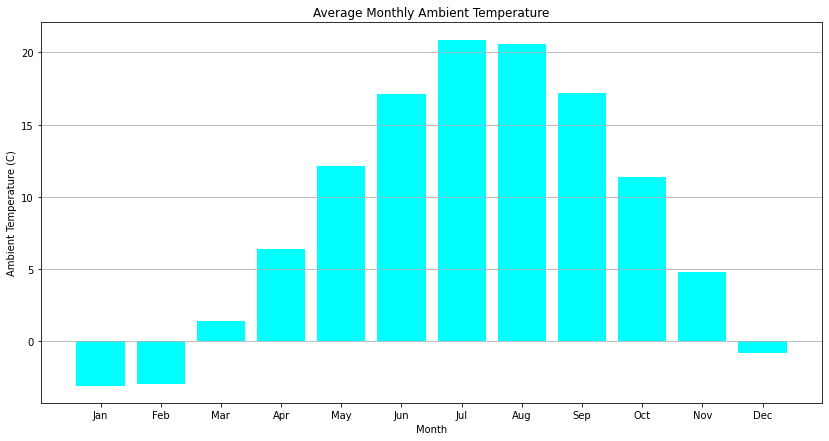

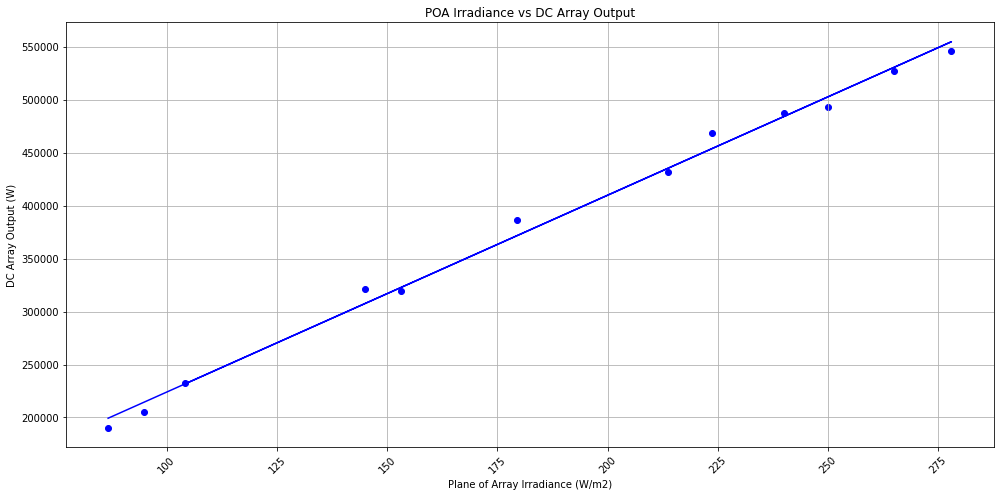

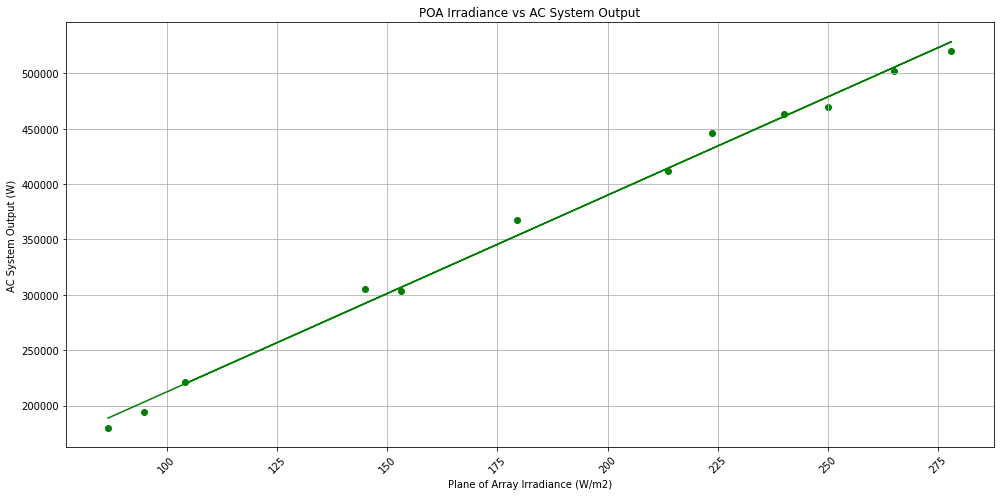

In [5]:
import numpy as np
# Given the available data, other useful plots for a solar project might include:
# 1. Monthly variation of Cell Temperature which affects the efficiency of solar panels.
# 2. Monthly variation of Ambient Temperature which might correlate with solar irradiance and system output.
# 3. The relationship between POA Irradiance and the DC/AC Output to understand the conversion efficiency.

# For better visualization, we will use the bar plots to show the average monthly variations.

# Monthly Average Cell Temperature Plot
plt.figure(figsize=(14, 7))
plt.bar(monthly_data['Month'], monthly_data['Cell Temperature (C)'], color='purple')
plt.title('Average Monthly Cell Temperature')
plt.xlabel('Month')
plt.ylabel('Cell Temperature (C)')
plt.grid(axis='y')
plt.show()

# Monthly Average Ambient Temperature Plot
plt.figure(figsize=(14, 7))
plt.bar(monthly_data['Month'], monthly_data['Ambient Temperature (C)'], color='cyan')
plt.title('Average Monthly Ambient Temperature')
plt.xlabel('Month')
plt.ylabel('Ambient Temperature (C)')
plt.grid(axis='y')
plt.show()

# Function to create scatter plot with a line of best fit
def plot_with_fit_line(df, x_col, y_col, x_label, y_label, title, line_color):
    plt.figure(figsize=(14, 7))
    plt.scatter(df[x_col], df[y_col], color=line_color)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    # Fit line
    z = np.polyfit(df[x_col], df[y_col], 1)
    p = np.poly1d(z)
    plt.plot(df[x_col], p(df[x_col]), linestyle='-', color=line_color)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()  # Adjust layout to prevent clipping of ylabel
    plt.show()

# Plot "Daily Average POA Irradiance (kWh/m2/day)" versus month with a fit line
plot_with_fit_line(monthly_data, 'Plane of Array Irradiance (W/m2)', 'DC Array Output (W)', 
                   'Plane of Array Irradiance (W/m2)', 'DC Array Output (W)', 
                   'POA Irradiance vs DC Array Output', 'blue')

# Plot "AC System Output (kWh)" versus month with a fit line
plot_with_fit_line(monthly_data, 'Plane of Array Irradiance (W/m2)', 'AC System Output (W)', 
                   'Plane of Array Irradiance (W/m2)', 'AC System Output (W)', 
                   'POA Irradiance vs AC System Output', 'green')

# Note: The scatter plots will show the relationship between irradiance and output, which might indicate the efficiency of conversion from DC to AC.


**Average Monthly Cell Temperature:** This bar plot in purple shows the variation in cell temperature by month. Cell temperature can significantly impact the efficiency of solar panels.

**Average Monthly Ambient Temperature:** The cyan bar plot illustrates the average ambient temperature for each month. Ambient temperature can affect both the performance of the solar panels and the patterns of energy usage.

**POA Irradiance vs DC Array Output:** The scatter plot in blue examines the relationship between the Plane of Array (POA) irradiance and the output of the DC array. This relationship can indicate the efficiency with which solar irradiance is converted into electrical energy by the panels.

**POA Irradiance vs AC System Output:** The scatter plot in green shows how the AC system output relates to the POA irradiance. This plot can provide insights into the overall efficiency of the system, including the inverter's performance in converting DC to usable AC power.

## 1-Axis Tracking

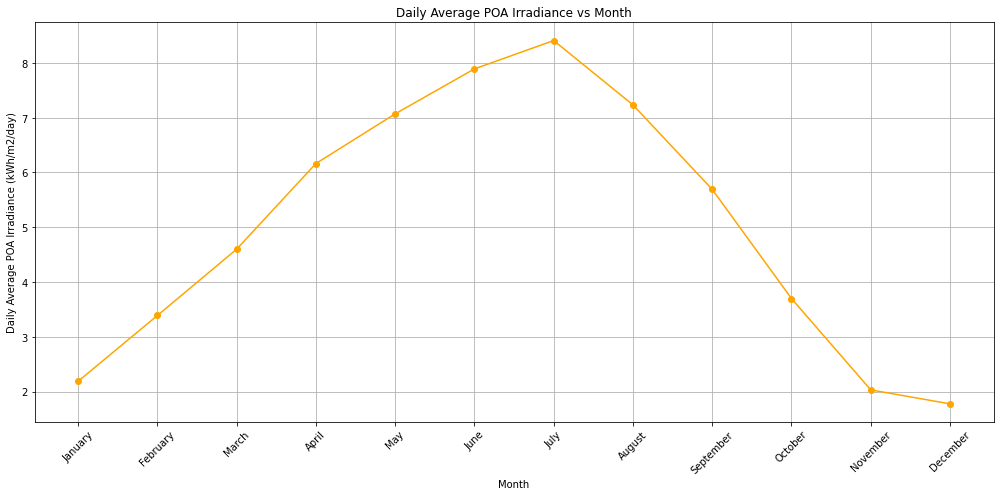

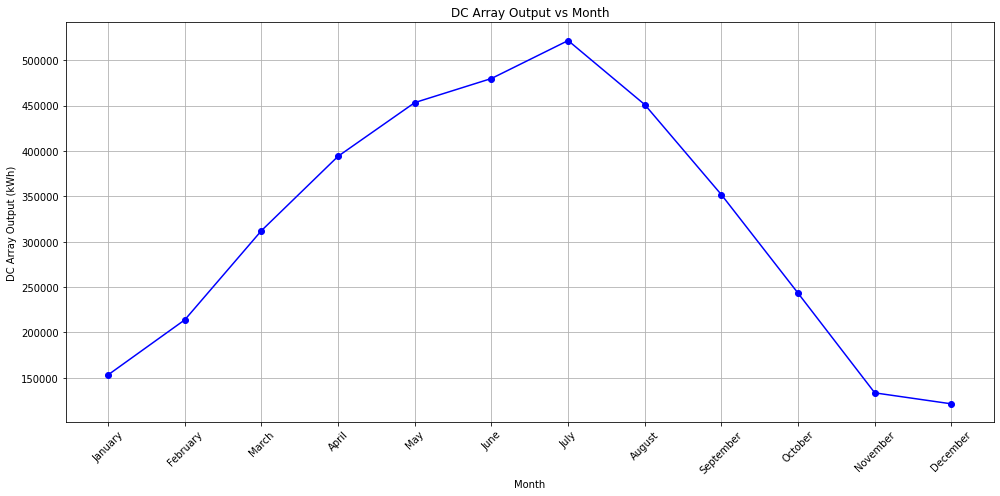

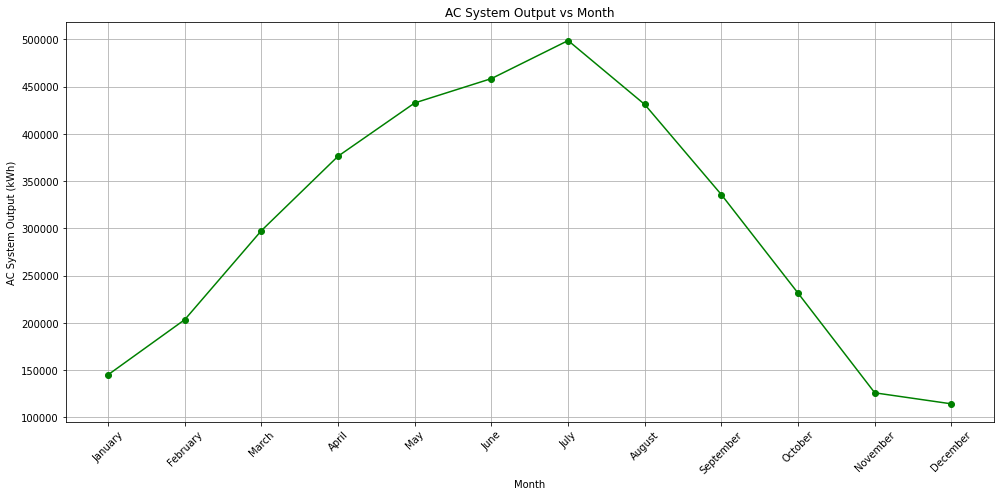

Total kWh from one-axis system: 3650743.1050000004


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

# Load the data from the CSV file
file_path = './1-axis_pvwatts_monthly.csv'

# You may need to adjust the number in skiprows to match the actual number of rows to skip
one_axis_solar_data = pd.read_csv(file_path, skiprows=range(0, 32))  # for example, if the first 31 lines are headers

# Calculate the total kWh produced by the one-axis system
one_axis_total_kWh = one_axis_solar_data['AC System Output (kWh)'].sum()

# Convert the 'Month' column to month names
one_axis_solar_data['Month'] = one_axis_solar_data['Month'].apply(lambda x: calendar.month_name[int(x)])

# Plot "Daily Average POA Irradiance (kWh/m2/day)" versus month
plt.figure(figsize=(14, 7))
plt.plot(one_axis_solar_data['Month'], one_axis_solar_data['Daily Average POA Irradiance (kWh/m2/day)'], marker='o', linestyle='-', color='orange')
plt.title('Daily Average POA Irradiance vs Month')
plt.xlabel('Month')
plt.ylabel('Daily Average POA Irradiance (kWh/m2/day)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of ylabel
plt.show()

# Plot "DC Array Output (kWh)" versus month
plt.figure(figsize=(14, 7))
plt.plot(one_axis_solar_data['Month'], one_axis_solar_data['DC Array Output (kWh)'], marker='o', linestyle='-', color='blue')
plt.title('DC Array Output vs Month')
plt.xlabel('Month')
plt.ylabel('DC Array Output (kWh)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of ylabel
plt.show()

# Plot "AC System Output (kWh)" versus month
plt.figure(figsize=(14, 7))
plt.plot(one_axis_solar_data['Month'], one_axis_solar_data['AC System Output (kWh)'], marker='o', linestyle='-', color='green')
plt.title('AC System Output vs Month')
plt.xlabel('Month')
plt.ylabel('AC System Output (kWh)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of ylabel
plt.show()

print("Total kWh from one-axis system:", one_axis_total_kWh)


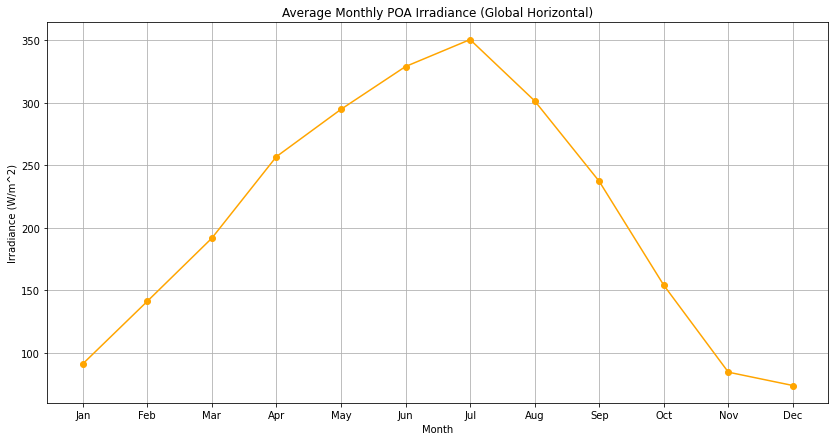

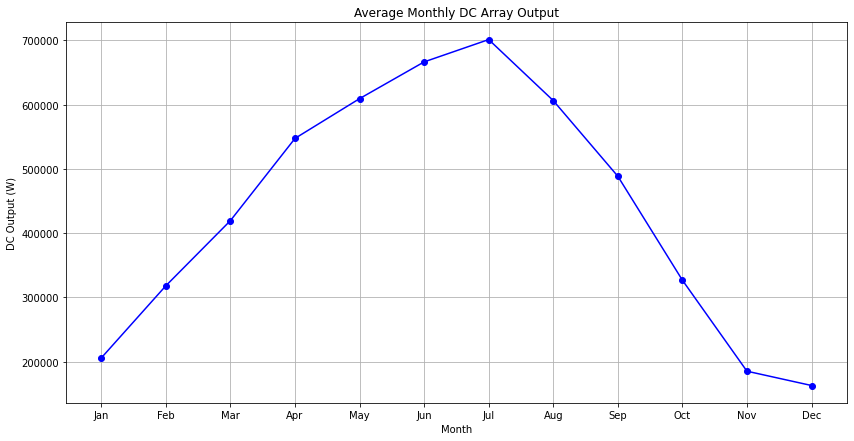

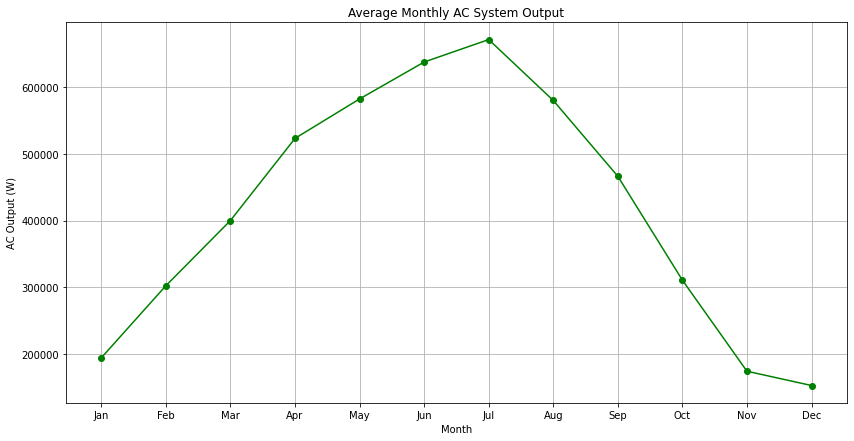

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

# Load the hourly data from the CSV file, skipping the non-data rows and manually setting the column names
file_path_hourly = './1-axis_pvwatts_hourly.csv'
one_axis_solar_data_hourly = pd.read_csv(file_path_hourly, skiprows=31)

# Convert the 'Month' column to month names for better readability in the plots
one_axis_solar_data_hourly['Month'] = one_axis_solar_data_hourly['Month'].apply(lambda x: calendar.month_abbr[int(x)])

# Group the data by month to get average values for each month
monthly_data = one_axis_solar_data_hourly.groupby('Month', sort=False).mean().reset_index()

# Plot "POA Irradiance (Global Horizontal) (kW/m^2)" versus month
plt.figure(figsize=(14, 7))
plt.plot(monthly_data['Month'], monthly_data['Plane of Array Irradiance (W/m2)'], marker='o', linestyle='-', color='orange')
plt.title('Average Monthly POA Irradiance (Global Horizontal)')
plt.xlabel('Month')
plt.ylabel('Irradiance (W/m^2)')
plt.grid(True)
plt.show()

# Plot "DC Array Output (W)" versus month
plt.figure(figsize=(14, 7))
plt.plot(monthly_data['Month'], monthly_data['DC Array Output (W)'], marker='o', linestyle='-', color='blue')
plt.title('Average Monthly DC Array Output')
plt.xlabel('Month')
plt.ylabel('DC Output (W)')
plt.grid(True)
plt.show()

# Plot "AC System Output (W)" versus month
plt.figure(figsize=(14, 7))
plt.plot(monthly_data['Month'], monthly_data['AC System Output (W)'], marker='o', linestyle='-', color='green')
plt.title('Average Monthly AC System Output')
plt.xlabel('Month')
plt.ylabel('AC Output (W)')
plt.grid(True)
plt.show()


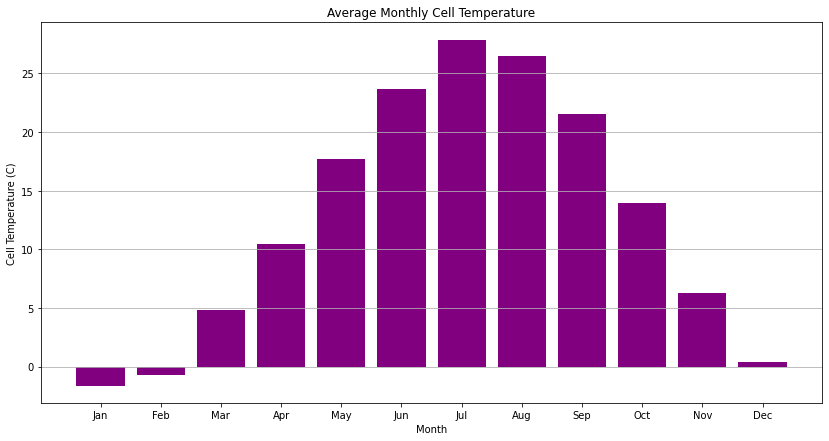

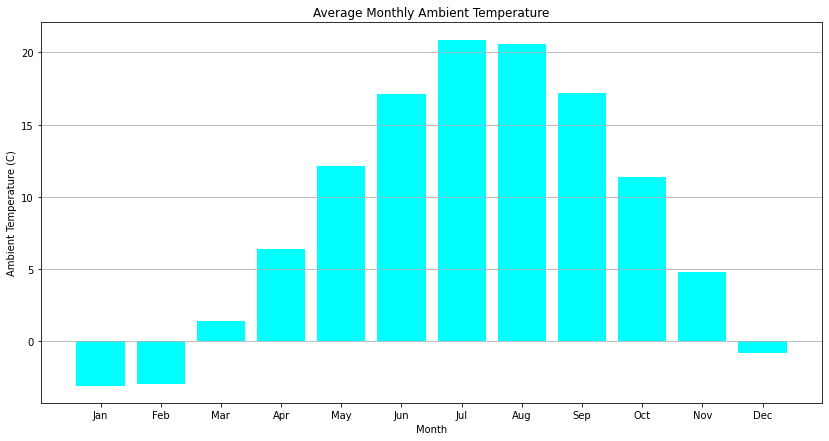

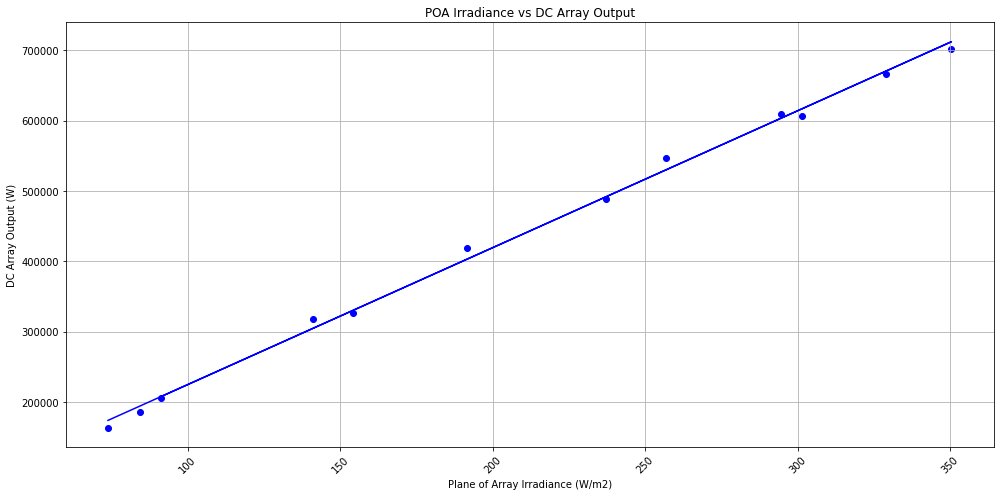

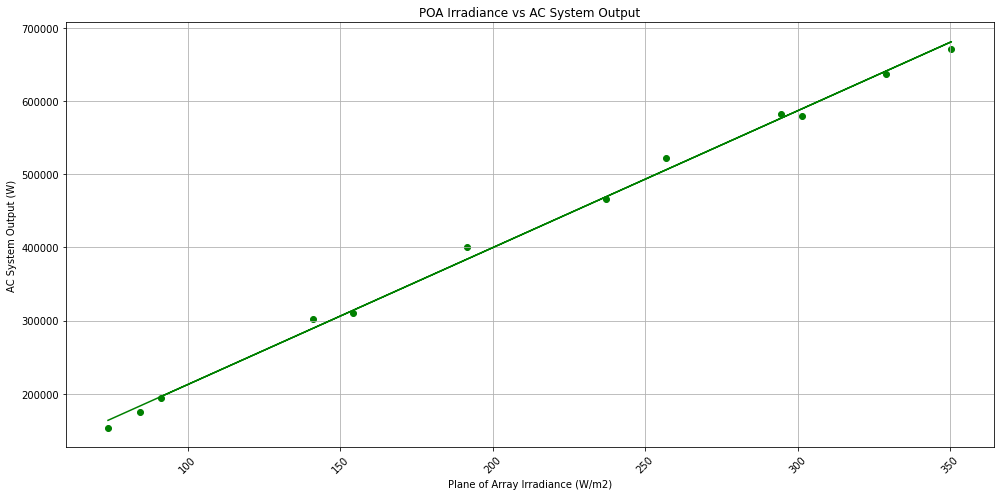

In [8]:
import numpy as np
# Given the available data, other useful plots for a solar project might include:
# 1. Monthly variation of Cell Temperature which affects the efficiency of solar panels.
# 2. Monthly variation of Ambient Temperature which might correlate with solar irradiance and system output.
# 3. The relationship between POA Irradiance and the DC/AC Output to understand the conversion efficiency.

# For better visualization, we will use the bar plots to show the average monthly variations.

# Monthly Average Cell Temperature Plot
plt.figure(figsize=(14, 7))
plt.bar(monthly_data['Month'], monthly_data['Cell Temperature (C)'], color='purple')
plt.title('Average Monthly Cell Temperature')
plt.xlabel('Month')
plt.ylabel('Cell Temperature (C)')
plt.grid(axis='y')
plt.show()

# Monthly Average Ambient Temperature Plot
plt.figure(figsize=(14, 7))
plt.bar(monthly_data['Month'], monthly_data['Ambient Temperature (C)'], color='cyan')
plt.title('Average Monthly Ambient Temperature')
plt.xlabel('Month')
plt.ylabel('Ambient Temperature (C)')
plt.grid(axis='y')
plt.show()

# Function to create scatter plot with a line of best fit
def plot_with_fit_line(df, x_col, y_col, x_label, y_label, title, line_color):
    plt.figure(figsize=(14, 7))
    plt.scatter(df[x_col], df[y_col], color=line_color)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    # Fit line
    z = np.polyfit(df[x_col], df[y_col], 1)
    p = np.poly1d(z)
    plt.plot(df[x_col], p(df[x_col]), linestyle='-', color=line_color)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()  # Adjust layout to prevent clipping of ylabel
    plt.show()

# Plot "Daily Average POA Irradiance (kWh/m2/day)" versus month with a fit line
plot_with_fit_line(monthly_data, 'Plane of Array Irradiance (W/m2)', 'DC Array Output (W)', 
                   'Plane of Array Irradiance (W/m2)', 'DC Array Output (W)', 
                   'POA Irradiance vs DC Array Output', 'blue')

# Plot "AC System Output (kWh)" versus month with a fit line
plot_with_fit_line(monthly_data, 'Plane of Array Irradiance (W/m2)', 'AC System Output (W)', 
                   'Plane of Array Irradiance (W/m2)', 'AC System Output (W)', 
                   'POA Irradiance vs AC System Output', 'green')

# Note: The scatter plots will show the relationship between irradiance and output, which might indicate the efficiency of conversion from DC to AC.


# Cost Break down
## Sell electricity generated for $\$0.44/kWh $
## Average total cost of Solar System based on historical data adjusted for inflation: $\$3.85/W $
Based on this study
https://environmentalsystemsresearch.springeropen.com/articles/10.1186/2193-2697-2-5

## Cost of PERC LG solar Cell $\$1.88/W$ [CAD] according to study installation and other equipment doubles cost:
## Total Cost including installation = $\$3.76/W$

## Payback breakdown using $2491.5kWdc$ associated with $16610m^2$

In [9]:
Total_Wattage = 2491.5*1000 #System Capacity
Total_Cost_per_Watt = 3.85 #CAD
Total_Project_cost = Total_Wattage*Total_Cost_per_Watt
print("Total cost based on historical data adjusted for inflation in CAD: $"+str(Total_Project_cost))

Total cost based on historical data adjusted for inflation in CAD: $9592275.0


## 1-Axis tracking payback

In [10]:
# now look at payback
revenue_per_kW_hour = 0.44 #$0.44/kWh
one_axis_total_production_yearly = one_axis_total_kWh #kWh/year
revenue_one_axis_yearly=revenue_per_kW_hour*one_axis_total_production_yearly #$/year [CAD]

print("Total yearly revenue one_axis_tracking: $"+str(revenue_one_axis_yearly))

#payback period
payback_period = Total_Project_cost/revenue_one_axis_yearly
print("Payback period years: "+str(payback_period))

Total yearly revenue one_axis_tracking: $1606326.9662000001
Payback period years: 5.97155822061054


## Fixed payback

In [11]:
# now look at payback
revenue_per_kW_hour = 0.44 #$0.44/kWh
fixed_total_production_yearly = fixed_total_kWh #kWh/year
revenue_fixed_yearly=revenue_per_kW_hour*fixed_total_production_yearly #$/year [CAD]

print("Total yearly revenue fixed: $"+str(revenue_fixed_yearly))

#payback period
payback_period = Total_Project_cost/revenue_fixed_yearly
print("Payback period years: "+str(payback_period))

Total yearly revenue fixed: $1409348.80284
Payback period years: 6.8061752922132985


## Still Need to include battery costs
## calculated battery capacity needs based on highest consuming month -> day
## also compared to solar generation to find overall worst day for energy storage / generation

In [12]:
print("Max daily consumption based on max monthly with 20% deviation: "+str(daily_max_consumption)+" kWh")

# find the worst day based on the difference in energy consumtion and energy production
# first for fixed data
# use hourly data to group the data by days
# loop through the AC daily energy generation for fixed data and subtract it by the max monthly consumption/30 (representing the daily consumption) for the month the hourly data was taken based on the research park data 

Max daily consumption based on max monthly with 20% deviation: 7425.466666666666 kWh


find the maximum energy consumption for each month using the research park data, divide that by 30 to find the max daily for that month, then use the fixed hourly solar data and group it by day to determine the daily solar generation,

In [13]:

# Assuming research_park_consumption has been loaded into the environment
# as shown in the image provided

# Parse the 'Date' column for month and year
research_park_consumption['Month'] = pd.to_datetime(research_park_consumption['Date']).dt.month
research_park_consumption['Year'] = pd.to_datetime(research_park_consumption['Date']).dt.year

# Find the maximum daily energy consumption for each month
research_park_consumption['Max Daily Consumption'] = research_park_consumption.groupby(['Year', 'Month'])['Consumption'].transform('max') / 30

# Load the fixed solar hourly data
fixed_solar_data_path = './fixed_pvwatts_hourly.csv'  # Adjust the path to your file
fixed_solar_data = pd.read_csv(fixed_solar_data_path, skiprows=31)  # Adjust skiprows as necessary

fixed_solar_data

#research_park_consumption

Month  Day  Hour  Beam Irradiance (W/m2)  Diffuse Irradiance (W/m2)  \
0         1    1     0                       0                          0   
1         1    1     1                       0                          0   
2         1    1     2                       0                          0   
3         1    1     3                       0                          0   
4         1    1     4                       0                          0   
...     ...  ...   ...                     ...                        ...   
8755     12   31    19                       0                          0   
8756     12   31    20                       0                          0   
8757     12   31    21                       0                          0   
8758     12   31    22                       0                          0   
8759     12   31    23                       0                          0   

      Ambient Temperature (C)  Wind Speed (m/s)  Albedo  \
0                        -4.0               4.4    0.87   
1                        -5.0               4.3    0.87   
2                        -5.0               4.1    0.87   
3                        -6.0               3.9    0.87   
4                        -6.0               3.9    0.87   
...                       ...               ...     ...   
8755                      0.0               3.9    0.87   
8756                     -1.0               3.7    0.87   
8757                     -2.0               3.7    0.87   
8758                     -3.0               4.0    0.87   
8759                     -3.0               4.3    0.87   

      Plane of Array Irradiance (W/m2)  Cell Temperature (C)  \
0                                  0.0                  -4.0   
1                                  0.0                  -5.0   
2                                  0.0                  -5.0   
3                                  0.0                  -6.0   
4                                  0.0                  -6.0   
...                                ...                   ...   
8755                               0.0                   0.0   
8756                               0.0                  -1.0   
8757                               0.0                  -2.0   
8758                               0.0                  -3.0   
8759                               0.0                  -3.0   

      DC Array Output (W)  AC System Output (W)  
0                     0.0                   0.0  
1                     0.0                   0.0  
2                     0.0                   0.0  
3                     0.0                   0.0  
4                     0.0                   0.0  
...                   ...                   ...  
8755                  0.0                   0.0  
8756                  0.0                   0.0  
8757                  0.0                   0.0  
8758                  0.0                   0.0  
8759                  0.0                   0.0  

[8760 rows x 12 columns]

In [14]:

# Assuming 'research_park_consumption' is loaded and contains 'Date' and 'Consumption' columns
research_park_consumption['Date'] = pd.to_datetime(research_park_consumption['Date'])
research_park_consumption['Month'] = research_park_consumption['Date'].dt.month
research_park_consumption['Day'] = research_park_consumption['Date'].dt.day

# Calculate maximum consumption for each month
max_consumption_per_month = research_park_consumption.groupby(['Month'])['Consumption'].max()
print(max_consumption_per_month)
max_daily_consumption = max_consumption_per_month / 30 *1000  # Assuming 30 days in a month for simplification * 1000 kW to W

# Assuming 'fixed_solar_data' is loaded with columns 'Month', 'Day', 'Hour', and 'AC System Output (W)'
# We'll calculate the total daily solar generation
fixed_solar_data['Date'] = pd.to_datetime(fixed_solar_data['Day'].astype(str) + '-' + fixed_solar_data['Month'].astype(str), format='%d-%m')
daily_solar_generation = fixed_solar_data.groupby(['Date'])['AC System Output (W)'].sum()

# Now we need to merge this with the consumption data
# First, create a DataFrame from the series with an additional 'Date' column
max_daily_consumption_df = max_daily_consumption.reset_index()
max_daily_consumption_df['Date'] = pd.to_datetime(max_daily_consumption_df['Month'].astype(str), format='%m').apply(lambda x: x.replace(year=1900))  # Using a placeholder year

# Merge the consumption and generation DataFrames
comparison_df = pd.merge(max_daily_consumption_df, daily_solar_generation.reset_index(), on='Date', how='inner')

# Calculate the deficit
comparison_df['Daily Deficit'] = comparison_df['AC System Output (W)'] - comparison_df['Consumption']

# Find the day with the largest deficit
worst_day = comparison_df.loc[comparison_df['Daily Deficit'].idxmin()]

# Output the worst day
worst_day_info = {
    "Month-Day": worst_day['Date'].strftime('%m-%d'),
    "Daily Deficit": worst_day['Daily Deficit']
}
print("Data in Wh")
comparison_df

Month
1      57396
2      58076
3      57589
4      54784
5      70822
6     105603
7     222764
8     114485
9     124668
10    212701
11    169746
12     67048
Name: Consumption, dtype: int64
Data in Wh


Month   Consumption       Date  AC System Output (W)  Daily Deficit
0       1  1.913200e+06 1900-01-01          9.317974e+06   7.404774e+06
1       2  1.935867e+06 1900-02-01          3.941206e+06   2.005339e+06
2       3  1.919633e+06 1900-03-01          1.052334e+07   8.603708e+06
3       4  1.826133e+06 1900-04-01          1.272013e+07   1.089400e+07
4       5  2.360733e+06 1900-05-01          1.503896e+07   1.267822e+07
5       6  3.520100e+06 1900-06-01          1.703764e+07   1.351754e+07
6       7  7.425467e+06 1900-07-01          1.606655e+07   8.641081e+06
7       8  3.816167e+06 1900-08-01          1.497020e+07   1.115404e+07
8       9  4.155600e+06 1900-09-01          1.051389e+07   6.358292e+06
9      10  7.090033e+06 1900-10-01          1.241756e+07   5.327528e+06
10     11  5.658200e+06 1900-11-01          1.556329e+06  -4.101871e+06
11     12  2.234933e+06 1900-12-01          7.204644e+06   4.969710e+06

In [15]:
worst_day

Month                                    11
Consumption                       5658200.0
Date                    1900-11-01 00:00:00
AC System Output (W)            1556329.229
Daily Deficit                  -4101870.771
Name: 10, dtype: object

In [16]:
battery_cap = abs (worst_day['Daily Deficit'])
print("Maximum needed Battery Capacity: "+str(battery_cap)+" Wh")
print("Maximum needed Battery Capacity: "+str(battery_cap/1000)+" kWh")

Maximum needed Battery Capacity: 4101870.7709999997 Wh
Maximum needed Battery Capacity: 4101.870771 kWh


- OEB says outages last under 3hrs on average
24/8 = 3 -> only need a single battery to supply 3hrs
https://www.oeb.ca/oeb/_Documents/EB-2010-0249/OEB_Reliability%20Residential%20Survey_2010.pdf

## Therefore using a ~500kWh Battery would be sufficient:
516 KWh (500 KWh) Industrial Battery Backup And Energy Storage Systems (ESS) (277/480Y Three Phase)

Regular price
$\$781,035.00  [USD]$ $\$1063964.93  [CAD]$

https://www.backupbatterypower.com/products/516-kwh-industrial-battery-backup-and-energy-storage-systems-ess-277-480y-three-phase

Also looking into this one:
https://www.symtechsolar.com/battery-energy-storage-systems/500kw-battery-energy-storage-system/

## Adjusted payback period with Battery
###  1-Axis tracking payback


In [17]:
battery_cost = 1063964.93 #CAD
# now look at payback
Total_Project_cost_new =Total_Project_cost+ battery_cost

#payback period
print(Total_Project_cost)

print(Total_Project_cost_new)
payback_period = Total_Project_cost_new/revenue_one_axis_yearly
print("Payback period One Axis years: "+str(payback_period))

#payback period
payback_period = Total_Project_cost_new/revenue_fixed_yearly
print("Payback period Fixed years: "+str(payback_period))

9592275.0
10656239.93
Payback period One Axis years: 6.633917100457377
Payback period Fixed years: 7.561109009016398
